# Punto 3

In [ ]:
import numpy as np
import pandas as pd
import time

# 1. Crear la matriz con NumPy
n_rows = 500_000
n_cols = 10
data = np.random.randint(0, 1000, size=(n_rows, n_cols))  # valores enteros entre 0 y 999

df = pd.DataFrame(data, columns=[f"col{i}" for i in range(1, n_cols+1)])

# ---------- Guardado ---------- #
# CSV
start = time.time()
df.to_csv("data.csv", index=False)
end = time.time()
print(f"Tiempo en guardar CSV: {end - start:.2f} segundos")

# Excel
start = time.time()
df.to_excel("data.xlsx", index=False)
end = time.time()
print(f"Tiempo en guardar Excel: {end - start:.2f} segundos")

# Parquet
start = time.time()
df.to_parquet("data.parquet", index=False)
end = time.time()
print(f"Tiempo en guardar Parquet: {end - start:.2f} segundos")

# ---------- Carga ---------- #
# CSV
start = time.time()
df_csv = pd.read_csv("data.csv")
end = time.time()
print(f"Tiempo en cargar CSV: {end - start:.2f} segundos")

# Excel
start = time.time()
df_excel = pd.read_excel("data.xlsx")
end = time.time()
print(f"Tiempo en cargar Excel: {end - start:.2f} segundos")

# Parquet
start = time.time()
df_parquet = pd.read_parquet("data.parquet")
end = time.time()
print(f"Tiempo en cargar Parquet: {end - start:.2f} segundos")


Tiempo en guardar CSV: 3.62 segundos
Tiempo en guardar Excel: 82.28 segundos
Tiempo en guardar Parquet: 0.30 segundos
Tiempo en cargar CSV: 0.30 segundos
Tiempo en cargar Excel: 47.68 segundos
Tiempo en cargar Parquet: 0.27 segundos


# Punto 4

Multiprocessing uses multiple CPUs to run many processes at a time while multithreading creates multiple threads within a single process to get faster and more efficient task execution. Both Multiprocessing and Multithreading are used to increase the computing power of a system in different ways.

Multiprocessing: a system that has more than one or two processors. In Multiprocessing, CPUs are added to increase the computing speed of the system. Because of Multiprocessing, There are many processes are executed simultaneously. There are 2 categories: Symmetric and Asymmetric processing.


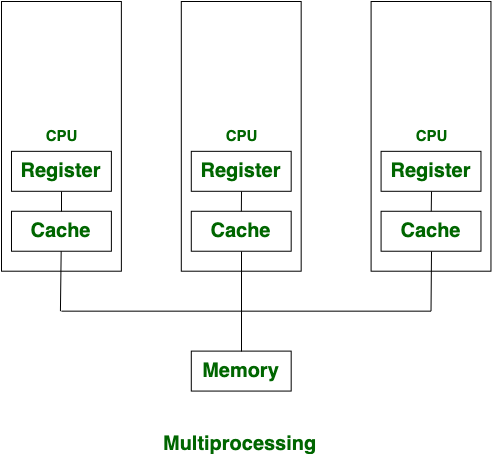

Multithreading is a system in which multiple threads are created of a process for increasing the computing speed of the system. In multithreading, many threads of a process are executed simultaneously and process creation in multithreading is done according to economical.

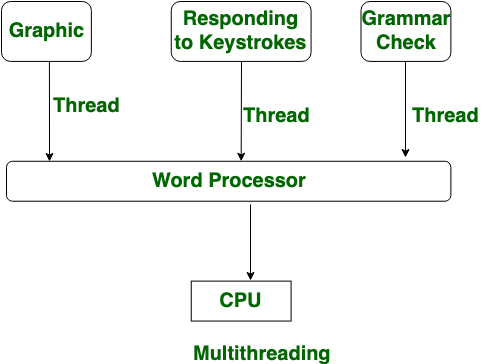

Continuando con las definiciones anteriores:

**Multiprocessing:**

*   Involucra la creación de múltiples procesos independientes, cada uno con su propio espacio de memoria y GIL (Global Interpreter Lock) en Python.
*   Permite aprovechar múltiples núcleos de CPU para ejecutar tareas en paralelo real, lo que es ideal para tareas con uso intensivo de CPU (CPU-bound).
*   La comunicación entre procesos es más compleja y requiere mecanismos como colas o pipes.
*   Tiene una sobrecarga mayor debido a la creación y gestión de procesos.

**Multithreading:**

*   Involucra la creación de múltiples hilos dentro de un único proceso. Estos hilos comparten el mismo espacio de memoria y están sujetos al GIL en Python, lo que limita la ejecución paralela real de tareas con uso intensivo de CPU en un solo proceso.
*   Es más adecuado para tareas con uso intensivo de E/S (I/O-bound), como leer/escribir archivos o hacer solicitudes de red, donde los hilos pueden esperar sin bloquear todo el proceso.
*   La comunicación entre hilos es más sencilla ya que comparten memoria.
*   Tiene una sobrecarga menor que el multiprocessing.

**¿Cuál es más útil en el contexto de la ingeniería de datos?**

En el contexto de la ingeniería de datos, donde a menudo se realizan operaciones intensivas en CPU sobre grandes conjuntos de datos (transformaciones, cálculos, etc.), el **multiprocessing** suele ser más útil. Permite distribuir la carga de trabajo entre varios núcleos de CPU, logrando una aceleración significativa en el procesamiento.

Aunque el multithreading puede ser útil para tareas de E/S (por ejemplo, descargar datos de múltiples fuentes simultáneamente), no proporcionará una mejora de rendimiento para las operaciones de procesamiento de datos puramente computacionales debido al GIL de Python.


**Ejemplo práctico:**

A continuación, se muestra un ejemplo que compara el tiempo de ejecución de una tarea intensiva en CPU utilizando un enfoque secuencial, multithreading y multiprocessing. La tarea consiste en aplicar una función a cada fila de un DataFrame.

In [ ]:
import time
import pandas as pd
import numpy as np
from multiprocessing import Pool
from threading import Thread

# Crear un DataFrame grande para el ejemplo
n_rows = 1_000_000
n_cols = 5
data = np.random.rand(n_rows, n_cols)
df_example = pd.DataFrame(data, columns=[f"col{i}" for i in range(1, n_cols+1)])

# Función intensiva en CPU
def process_row(row):
    # Simular una operación costosa
    return np.sum(np.sqrt(row))

# Enfoque secuencial
start_time = time.time()
results_sequential = df_example.apply(process_row, axis=1)
end_time = time.time()
print(f"Tiempo secuencial: {end_time - start_time:.2f} segundos")

# Enfoque con Multithreading (no se espera una mejora significativa para esta tarea de CPU-bound)
start_time = time.time()
results_threaded = []
threads = []

def process_row_threaded(row, result_list):
    result_list.append(process_row(row))

for index, row in df_example.iterrows():
    thread = Thread(target=process_row_threaded, args=(row, results_threaded))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

end_time = time.time()
print(f"Tiempo con Multithreading: {end_time - start_time:.2f} segundos")


# Enfoque con Multiprocessing
start_time = time.time()
with Pool() as pool:
    results_multiprocessing = pool.map(process_row, [row for index, row in df_example.iterrows()])
end_time = time.time()
print(f"Tiempo con Multiprocessing: {end_time - start_time:.2f} segundos")

Multiprocessing es generalmente más útil en ingeniería de datos que multithreading debido a la naturaleza de las tareas comunes en este campo. Las operaciones de procesamiento de datos, como transformaciones y cálculos en grandes conjuntos de datos, suelen ser intensivas en CPU.

Multiprocessing crea procesos separados, cada uno con su propio intérprete de Python y espacio de memoria. Esto permite que estas tareas intensivas en CPU se ejecuten en paralelo real en múltiples núcleos de procesador, superando la limitación del GIL (Global Interpreter Lock) de Python que restringe la ejecución paralela de código Python en un solo proceso, incluso con múltiples hilos.

Mientras que multithreading es útil para tareas intensivas en I/O (como leer archivos o hacer solicitudes de red), no proporciona una mejora significativa para operaciones puramente computacionales debido al GIL. Por lo tanto, para acelerar el procesamiento de datos que requiere mucha CPU, multiprocessing es la opción más efectiva.

# Punto 5

### datetime

In [ ]:
# Se utiliza pd.to_datetime
import pandas as pd

df = pd.DataFrame({"fecha": ["2025-01-01", "2025-02-15", "2025-03-20"]})
df["fecha"] = pd.to_datetime(df["fecha"])
print(df.dtypes)

# Las ventajas de este tipo de dato son:

# Permite operaciones de fechas (resta de fechas, comparaciones).
# Acceso a propiedades con .dt (ejemplo: df["fecha"].dt.year).
# Mejor rendimiento y consistencia en consultas temporales.


### Join, concat y merge

In [3]:
# DataFrame 1
df1 = pd.DataFrame({
    "nombre": ["Ana", "Luis", "Carlos"],
    "edad": [23, 35, 45]
}, index=[1, 2, 3])

# DataFrame 2
df2 = pd.DataFrame({
    "ciudad": ["Bogotá", "Medellín", "Cali"]
}, index=[2, 3, 4])

In [7]:
# Concat se usa cuando se desea juntas los dataframes por columnas o por filas (apilando filas o columnas)
pd.concat([df1, df2], axis=0)  # filas
pd.concat([df1, df2], axis=1)  # columnas

# Join se usa cuando se quiere juntas por el índice de una columna

print("df1:\n", df1)
print("\ndf2:\n", df2)

# Hacemos un join
resultado = df1.join(df2, how="inner")
print("\nINNER JOIN:\n", resultado)


concat = pd.concat([df1, df2], axis=1)
print("\nCONCAT:\n", concat)

merge = pd.merge(df1, df2, left_index=True, right_index=True)
# left_index es
print("\nMERGE:\n", merge)

# Cuándo usar cuál?
# Use concat for simple stacking of DataFrames. (sea columnar o de filas)
# Use join when you want to combine DataFrames based on their indices. (siendo el índice como el # de fila)
# Use merge for more complex merging scenarios based on columns or indices with different join types.

#El merge es el más poderoso, se pueden especificar las columnas que se quieren mergear usando left_on y right_on. Soporta varios tipos de join.
# Especificar left y right_index = true es un inner join.


df1:
    nombre  edad
1     Ana    23
2    Luis    35
3  Carlos    45

df2:
      ciudad
2    Bogotá
3  Medellín
4      Cali

INNER JOIN:
    nombre  edad    ciudad
2    Luis    35    Bogotá
3  Carlos    45  Medellín

CONCAT:
    nombre  edad    ciudad
1     Ana  23.0       NaN
2    Luis  35.0    Bogotá
3  Carlos  45.0  Medellín
4     NaN   NaN      Cali

MERGE:
    nombre  edad    ciudad
2    Luis    35    Bogotá
3  Carlos    45  Medellín


In [2]:
#índices
import pandas as pd

df = pd.DataFrame({
    "nombre": ["Ana", "Luis", "Carlos"],
    "edad": [23, 35, 45]
})

print(df)
print("\nÍndice:", df.index)


   nombre  edad
0     Ana    23
1    Luis    35
2  Carlos    45

Índice: RangeIndex(start=0, stop=3, step=1)


### datos nulos (isna) y relleno de datos (fillna)

In [9]:
# Detección de nulos
df.isna().sum()

# Filling nulos
df.fillna(1)
# Inplace es para modificar el objeto existente en vez de crear uno nuevo
df.fillna(0, inplace=True)

,nombre,edad
0,Ana,23
1,Luis,35
2,Carlos,45


### Window functions

In [11]:
# .rolling() y .expanding()

import numpy as np

df = pd.DataFrame({"id": range(1, 6), "valor": [10, 20, 30, 40, 50]})

# 1. Promedio móvil (rolling average) (AVG OVER ROWS)
df["media_movil"] = df["valor"].rolling(3).mean()
# En este ejemplo hasta que no se completa la ventana no hay números

# 2. Suma acumulada (SUM OVER ROWS UNBOUNDED PRECEDING)
df["suma_acumulada"] = df["valor"].expanding().sum()


# 3. Ranking (RANK)
df["ranking"] = df["valor"].rank(method="dense", ascending=False)

print(df)

# .rolling(#) crea una ventana de un tamaño fijo
# .expanding() crea una ventana que empieza con sólo el primer elemento y se va expandiendo a las demás filas, ideal para cálculos acumulados

# Equivalente en SQL: rolling() -> AVG(col) OVER (ROWS 2 PRECEDING)
# Equivalente en SQL: expanding() -> AVG(col) OVER (ROWS UNBOUNDED PRECEDING)

   id  valor  media_movil  suma_acumulada  ranking
0   1     10          NaN            10.0      5.0
1   2     20          NaN            30.0      4.0
2   3     30         20.0            60.0      3.0
3   4     40         30.0           100.0      2.0
4   5     50         40.0           150.0      1.0


### Crosstab, pivot y melt

In [16]:
# CROSSTAB
# Sirve para hacer tablas de contingencia (frecuencias de ocurrencias de combinaciones entre variables categóricas).

df = pd.DataFrame({
    "sexo": ["M", "F", "F", "M", "F"],
    "aprobado": ["Sí", "Sí", "No", "No", "Sí"]
})

tabla = pd.crosstab(df["sexo"], df["aprobado"])
print(tabla)

# También se puede normalizar 0-1
tabla = pd.crosstab(df["sexo"], df["aprobado"], normalize="index")
print(tabla)
print()

# PIVOT
# Sirve para reorganizar un DataFrame, convirtiendo una columna en las filas (índice), otra en las columnas, y otra en los valores.

df = pd.DataFrame({
    "fecha": ["2025-01", "2025-01", "2025-02", "2025-02"],
    "producto": ["A", "B", "A", "B"],
    "ventas": [100, 150, 200, 250]
})

tabla = df.pivot(index="fecha", columns="producto", values="ventas")
print(tabla)

print()

# pivot solo funciona si no hay duplicados en el cruce index+columns. Si los hay → usar pivot_table con un aggfunc.

# MELT (UNPIVOT)
# Contraria de pivot. Convierte columnas en filas (transforma de “ancho” a “largo”).

df = pd.DataFrame({
    "id": [1, 2],
    "A": [10, 20],
    "B": [30, 40]
})

largo = pd.melt(df, id_vars=["id"], value_vars=["A", "B"],
                var_name="variable", value_name="valor")
print(largo)


aprobado  No  Sí
sexo            
F          1   2
M          1   1
aprobado        No        Sí
sexo                        
F         0.333333  0.666667
M         0.500000  0.500000

producto    A    B
fecha             
2025-01   100  150
2025-02   200  250

   id variable  valor
0   1        A     10
1   2        A     20
2   1        B     30
3   2        B     40


### Group by & Having

In [17]:
df = pd.DataFrame({
    "dept": ["IT", "IT", "HR", "HR", "Sales", "Sales"],
    "salary": [6000, 7000, 4000, 3000, 8000, 9000]
})

# Group by
agrupado = df.groupby("dept", as_index=False)["salary"].mean()

#Having con query()

print(agrupado.query("salary >= 4000"))

    dept  salary
1     IT  6500.0
2  Sales  8500.0


### Filtrar filaa

In [22]:
# Con .query() usado anteriormente
# Con expresiones booleanas
df[df["salary"] > 3000]
print(df[df["salary"] > 3000])

print()
# También se podría usar un .filter() en el groupby

resultado = df.groupby("dept").filter(lambda g: g["salary"].mean() > 5000)
print(resultado)


    dept  salary
0     IT    6000
1     IT    7000
2     HR    4000
4  Sales    8000
5  Sales    9000

    dept  salary
0     IT    6000
1     IT    7000
4  Sales    8000
5  Sales    9000


### CASE

In [24]:
df = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "nombre": ["Ana", "Luis", "Carlos", "Marta", "Sofía"],
    "score": [95, 58, 76, 40, 88]
})

# np.select()

condiciones = [
    df["score"] >= 90,
    df["score"] >= 60
]
valores = ["Excelente", "Aprobado"]

df["resultado"] = np.select(condiciones, valores, default="Reprobado")
print(df)

print()
# np.where()
df["resultado_where"] = np.where(
    df["score"] >= 60, "Aprobado", "Reprobado"
)

print(df)

   id  nombre  score  resultado
0   1     Ana     95  Excelente
1   2    Luis     58  Reprobado
2   3  Carlos     76   Aprobado
3   4   Marta     40  Reprobado
4   5   Sofía     88   Aprobado

   id  nombre  score  resultado resultado_where
0   1     Ana     95  Excelente        Aprobado
1   2    Luis     58  Reprobado       Reprobado
2   3  Carlos     76   Aprobado        Aprobado
3   4   Marta     40  Reprobado       Reprobado
4   5   Sofía     88   Aprobado        Aprobado


# Punto 6

1. Polars

Librería de DataFrames basada en Rust, con bindings en Python.

Ventajas:

Mucho más rápida que Pandas en operaciones grandes (columnar + paralelización nativa).

Sintaxis similar a SQL y a Pandas.

Soporta lazy evaluation → no ejecuta hasta que realmente lo necesites (optimiza consultas).

2. Dask
Framework para procesamiento distribuido de datos en paralelo.

Ventajas:

Maneja datasets más grandes que la memoria RAM.

Tiene API muy parecida a Pandas → fácil migrar.

Escala de tu laptop a clusters de máquinas.

Menos rápido en pequeños datasets (overhead de paralelización).

3. Vaex
Librería de DataFrames optimizada para datasets masivos (billones de filas).

Ventajas:

Lazy loading y procesamiento en memoria mapeada (sin cargar todo en RAM).

Muy útil para exploración de datos de astronomía, finanzas, big data.

Incluye estadísticas rápidas (mean, hist, groupby) sin escanear todo el dataset.

4. Modin
Un "drop-in replacement" de Pandas.

Ventajas:

Cambias solo el import:

`import modin.pandas as pd`

Paraleliza operaciones de Pandas usando Ray o Dask.

Ideal si quieres mejorar velocidad sin reescribir código.

| Librería           | Escenarios ideales              | Ventajas clave                        |
| ------------------ | ------------------------------- | ------------------------------------- |
| **Polars**         | Análisis rápidos en CPU         | Muy veloz, lazy eval, sintaxis limpia |
| **Dask**           | Datasets mayores a RAM, cluster | Escala horizontalmente                |
| **Vaex**           | Billones de filas, exploración  | Carga en disco, memoria optimizada    |
| **Modin**          | Reemplazo rápido de Pandas      | Mismas funciones, paralelización      |
| **Koalas/PySpark** | Big Data en Spark               | Escala en clusters grandes            |
| **cuDF**           | GPU + Big Data/ML               | Aceleración masiva con CUDA           |
